In [1]:
# import libraries of interest
import pandas as pd
import numpy as np
import seaborn as sns

from tqdm import tqdm_notebook as tqdm

import matplotlib.pyplot as plt
%matplotlib inline

path = 'data/'

# Import the data

In [2]:
#publicationTitle|authorId|authorName|venueName|publicationDate|publicationKey

In [3]:
# import the parsed dblp.xml data set
xml_in = pd.read_csv('/Users/aj186039/projects/PMI_UseCase/data/DblpParser/01titleAuthorVenue.txt', sep='|', 
                     header=None, skiprows=1, names=['publicationTitle','authorId','authorName','venueName','publicationDate','publicationKey'], 
                     encoding='utf-8', low_memory=False)
xml_in.shape
#((11774650, 6)

(11785764, 6)

In [4]:
# change the data type of publicationDate column
xml_in['publicationDate'] = pd.to_datetime(xml_in['publicationDate'], format='%Y-%m-%d', errors='coerce')

In [5]:
# return the dtypes
xml_in.dtypes

publicationTitle            object
authorId                    object
authorName                  object
venueName                   object
publicationDate     datetime64[ns]
publicationKey              object
dtype: object

In [6]:
# show the first 5 rows of data frame
xml_in.head(5)

,publicationTitle,authorId,authorName,venueName,publicationDate,publicationKey
0,Nodal solutions for noncoercive nonlinear Neum...,1,Kaihao Liang,Transactions on Computational Collective Intel...,2017-05-08,journals/appml/HeHLL17
1,The Compensation Model for Default-Risk of Cor...,1,Kaihao Liang,Business Intelligence: Artificial Intelligence...,2017-06-01,conf/bife/LiangL09a
2,"An Adaptable, Portable Microarray Reader for B...",2,Dennis Matthews,Transactions on Rough Sets XVIII,2017-06-08,journals/sensors/ThompsonPTRMAWC09
3,State estimation and tracking of deforming pla...,2,Dennis Matthews,2014 IEEE International Conference on Robotics...,2017-05-22,conf/icra/BorumMB14
4,Experiments in quasi-static manipulation of a ...,2,Dennis Matthews,2012 IEEE/RSJ International Conference on Inte...,2017-05-22,conf/iros/MatthewsB12


In [7]:
# how many unique authors do we have?
xml_in['authorId'].nunique()

2055856

In [8]:
#how many rows do we have with nan in a given column?
xml_in[xml_in['venueName'].isnull()].count()

publicationTitle    318204
authorId            318204
authorName          318204
venueName                0
publicationDate     318200
publicationKey      318200
dtype: int64

In [9]:
#how many rows do we have with nan in a given column?
xml_in[xml_in['publicationDate'].isnull()].count()

publicationTitle    4
authorId            4
authorName          4
venueName           0
publicationDate     0
publicationKey      0
dtype: int64

In [10]:
#how many rows do we have with nan in a given column?
xml_in[xml_in['publicationKey'].isnull()].count()

publicationTitle    4
authorId            4
authorName          4
venueName           0
publicationDate     0
publicationKey      0
dtype: int64

In [11]:
#drop all rows that have any NaN values
xml_in.dropna(subset = ['venueName', 'publicationKey', 'publicationDate'], inplace = True) 

# general observation: NaNs in name_of_conference columns

In [12]:
# how many rows, columns do we have now?
xml_in.shape

(11467560, 6)

In [13]:
# we have this many remove from the data set
11785764 - 11467560

318204

# Take the sample of data

### Based on date column

In [ ]:
# take the publications whose publication date is yonger than x days
from datetime import datetime

xml_in['days_diff_to_publication'] = (datetime.now() - xml_in['publicationDate']).astype('timedelta64[D]')

In [ ]:
xml_in.head()

In [ ]:
# take into account only those publication whose publication date is younger than x days 
xml_in_sample1 = xml_in[xml_in['days_diff_to_publication'] < 100]

In [ ]:
# how many rows, columns do we have now?
xml_in_sample1.shape

In [ ]:
# how many unique authors do we have NOW?
xml_in_sample1['authorId'].nunique()

In [ ]:
# take subset to develop algorithm with it 
#list_=['conf/csse/DongS08','conf/csse/DapengS08','conf/csse/YongchiSJ08']

#xml_in = xml_in[xml_in['publicationKey'].isin(list_)]

### Based on random sample of rows

In [ ]:
xml_in_sample = xml_in.sample(500000)

In [ ]:
# how many rows, columns do we have now?
xml_in_sample.shape

### Based on random sample of authors

In [14]:
xml_in['authorName'].shape

(11467560,)

In [15]:
authors = xml_in['authorName'].unique().tolist()
random_authors = np.random.choice(authors, 100000)
random_authors_final = random_authors.tolist()

In [16]:
# take subset to develop algorithm with it 
xml_in_sample = xml_in[xml_in['authorName'].isin(random_authors_final)]

In [17]:
xml_in_sample.shape

(548526, 6)

In [18]:
xml_in_sample.head()

,publicationTitle,authorId,authorName,venueName,publicationDate,publicationKey
26,Career Anchors and Employee Retention: An Empi...,13,Ganesan Kannabiran,Transactions on Pattern Languages of Programmi...,2017-05-20,journals/ijkbo/KannabiranSN16
27,Relevance of Information Systems Strategic Pla...,13,Ganesan Kannabiran,Proceedings Second International Workshop on A...,2017-05-28,journals/jeco/KannabiranS11
28,Information Systems Planning in the Competitiv...,13,Ganesan Kannabiran,Pacific Asia Conference on Information Systems...,2012-02-28,conf/pacis/KannabiranKV08
29,Linkage Between Effective Implementation of IS...,13,Ganesan Kannabiran,A Conference on a Human Scale. 11th Americas C...,2012-02-28,conf/amcis/KannabiranNV05
45,Tangible props for scientific visualization: c...,19,Krzysztof Jakub Kruszynski,Transactions on Rough Sets XVIII,2017-05-26,journals/vr/KruszynskiL09


In [19]:
# how many unique authors do we have?
xml_in_sample['authorId'].nunique()

97553

### Based on the number of publications 

In [ ]:
# group the data by authorId and authorName and extract a number of stats from each group
grouped_df = xml_in.groupby(['authorId', 'authorName'], as_index=False)['publicationKey'].agg({'countPublications': 'count'})

In [ ]:
# join the output of the previos grouping action to the input data set 
# the goal is to optain an additional column which will contain count of publications per author
xml_in_merged = pd.merge(xml_in, grouped_df, on=['authorId', 'authorName'], how='left')

In [ ]:
# based on the newly created column we will make subsets of data
xml_in_sample = xml_in_merged[xml_in_merged['countPublications'] > 3]

In [ ]:
xml_in_sample.shape

In [ ]:
# how many unique authors do we have?
xml_in_sample['authorId'].nunique()

# Collect authors for a given publication

In [20]:
# group the data frame by publicationKey and extract a number of stats from each group

def get_tuple(series):
    return tuple(series) 

grouped_authors_by_publication = xml_in_sample.groupby(['publicationKey'], as_index=False)[['authorName', 'authorId']].agg({'authorName': get_tuple, 
                                                                                                                            'authorId': get_tuple})

In [21]:
grouped_authors_by_publication.head()

,publicationKey,authorName,authorId
0,books/sp/14/AntunesFG14,"(Bnullrbara Furtado,)","(248737,)"
1,books/sp/14/ForissierBMN14,"(Yves Mazabraud,)","(1199,)"
2,books/sp/14/Turner14,"(Roy M. Turner,)","(692027,)"
3,books/sp/15/AvgerinakisBK15,"(Konstantinos Avgerinakis,)","(2042196,)"
4,books/sp/15/BerminghamCCGIOSY15,"(Niamh Caprani,)","(496892,)"


In [22]:
# change the name for the convenience
grouped_authors_by_publication.rename(columns = {'authorName':'authorNames_in_given_publication'}, inplace = True)
grouped_authors_by_publication.rename(columns = {'authorId':'authorIds_in_given_publication'}, inplace = True)

In [23]:
# show last 5 rows of data frame
grouped_authors_by_publication.tail()

,publicationKey,authorNames_in_given_publication,authorIds_in_given_publication
511919,tr/trier/MI97-27,"(Peter Willems,)","(558250,)"
511920,tr/trier/MI98-06,"(Carsten Damm,)","(478871,)"
511921,tr/trier/MI98-20,"(Carsten Damm,)","(478871,)"
511922,tr/trier/MI98-21,"(Carsten Damm,)","(478871,)"
511923,tr/trier/MI99-20,"(Carsten Damm,)","(478871,)"


In [24]:
# join the output of the previos grouping action to the input data set 
# the goal is to optain an additional column which will contain all authors of that particulair publication
xml_in_merged = pd.merge(xml_in_sample, grouped_authors_by_publication, on=['publicationKey'], how='left')

In [25]:
# show last 2 rows of data frame
xml_in_merged.tail(2)

,publicationTitle,authorId,authorName,venueName,publicationDate,publicationKey,authorNames_in_given_publication,authorIds_in_given_publication
548524,Signal quality classification of mobile phone-...,2056903,Liesl J. Zuhlke,"IEEE International Conference on Acoustics, Sp...",2017-06-04,conf/icassp/SpringerBZANCMT14,"(Gari D. Clifford, Hassan Y. Abdelrahman, Lies...","(760327, 1481176, 2056903)"
548525,High efficiency video coding (HEVC): Replacing...,2056905,Jean-Pierre Henot,IEEE International Symposium on Broadband Mult...,2017-09-16,conf/bmsb/HenotRTKG13,"(Jean-Pierre Henot,)","(2056905,)"


In [26]:
# how many unique authors do we have?
xml_in_merged['authorId'].nunique()

97553

# Collect publications for a given author

In [27]:
# group the data frame by publicationKey and extract a number of stats from each group

def get_tuple(series):
    return tuple(series) 

grouped_authors_by_publication = xml_in_sample.groupby(['publicationKey'], as_index=False)[['authorName', 'authorId']].agg({'authorName': get_tuple, 
                                                                                                                     'authorId': get_tuple}) 

In [28]:
# Group the data frame by authorId and authorName and extract a number of stats from each group

import collections
    
def get_tuple(series):
    return tuple(series) 

def get_dict(series):
    tupleOfTuples = tuple(series)
    list_ = [element for tupl in tupleOfTuples for element in tupl]
    return collections.Counter(list_)
    
    
grouped_publications_by_author = xml_in_merged.groupby(['authorId', 'authorName'], as_index=False).agg({'publicationTitle': get_tuple,
                                                       'publicationDate': get_tuple,
                                                       'publicationKey': ['count', get_tuple],
                                                       'authorNames_in_given_publication': get_dict,
                                                       'authorIds_in_given_publication': get_dict})


In [29]:
grouped_publications_by_author.tail(2)

authorId             authorName  \
                                        
97551   999953              Luyu Wang   
97552   999995  Lunulls A. Lima Silva   

                                        publicationTitle  \
                                               get_tuple   
97551  (Automatic Selection of t-SNE Perplexity., One...   
97552  (PetroGrapher: managing petrographic data and ...   

      authorIds_in_given_publication  \
                            get_dict   
97551                  {'999953': 2}   
97552   {'999995': 12, '1263997': 2}   

                        authorNames_in_given_publication publicationKey  \
                                                get_dict          count   
97551                                   {'Luyu Wang': 2}              2   
97552  {'Lunulls A. Lima Silva': 12, 'Denise da Luz S...             12   

                                                          \
                                               get_tuple   
97551   (journals/corr/abs-1708-03229, conf/cis/HanWL16)   
97552  (journals/eswa/AbelSRMCN04, conf/seke/Siqueira...   

                                         publicationDate  
                                               get_tuple  
97551         (2017-09-05 00:00:00, 2017-05-26 00:00:00)  
97552  (2017-05-26 00:00:00, 2018-01-09 00:00:00, 201...

In [30]:
# rename the column names 
# MAKE SURE THE RENAMING IS OK AS THE ORDER OR COLUMNS MIGHT CHANGE
grouped_publications_by_author.columns = grouped_publications_by_author.columns.droplevel(0)
grouped_publications_by_author.columns = ['authorId', 'authorName','publicationTitles','authorCollaboratorIds','authorCollaborators','countPublications','publicationKeys','publicationDates']

In [31]:
# show first few rows
grouped_publications_by_author.tail(10)

,authorId,authorName,publicationTitles,authorCollaboratorIds,authorCollaborators,countPublications,publicationKeys,publicationDates
97543,999803,Mohit Choudhary,(Secure multicast model for ad-hoc military ne...,{'999803': 1},{'Mohit Choudhary': 1},1,"(conf/icon/ChoudharySS04,)","(2017-05-24 00:00:00,)"
97544,999805,Anna-Luisa Mnullller,(Economic Evaluation and Optimization of the D...,{'999805': 7},{'Anna-Luisa Mnullller': 7},7,"(journals/bise/BraunwarthKM10, journals/jds/Kl...","(2017-05-28 00:00:00, 2017-05-26 00:00:00, 201..."
97545,999825,Guoqiang Sun,(Day-Ahead Wind Speed Forecasting Using Releva...,"{'999825': 10, '678452': 1, '1446761': 1, '202...","{'Shewei Wang': 1, 'Yue Chen': 1, 'Linquan Bai...",10,"(journals/jam/SunCWLC14, journals/ijon/SunZLWS...","(2017-05-26 00:00:00, 2017-05-20 00:00:00, 201..."
97546,999853,Xinwei Ye,(Sparse Spatio-Temporal Representation With Ad...,"{'999853': 3, '1601782': 1}","{'Xinwei Ye': 3, 'Yong Li': 1}",3,"(journals/tcsv/XiongPYC13, conf/vcip/LiXY13, c...","(2017-05-26 00:00:00, 2017-05-25 00:00:00, 201..."
97547,999861,Ugo de'Liguoro,"(Combining Type Disciplines., Type Assignement...","{'999861': 54, '452558': 9}","{'Ugo de'Liguoro': 54, 'Steffen van Bakel': 9}",54,"(journals/apal/CardoneDd94, journals/entcs/Bar...","(2017-05-17 00:00:00, 2017-05-28 00:00:00, 201..."
97548,999867,Sharon Kuck,(Roles and their role in posing recursive quer...,{'999867': 1},{'Sharon Kuck': 1},1,"(journals/is/KuckJLN90,)","(2017-05-20 00:00:00,)"
97549,999902,Yuechuan Li,(PRNN: Recurrent Neural Network with Persisten...,{'999902': 5},{'Yuechuan Li': 5},5,"(journals/corr/abs-1801-08094, journals/corr/a...","(2018-02-02 00:00:00, 2018-01-04 00:00:00, 201..."
97550,99993,Jeruza Neyeloff,(Text mining approach to predict hospital admi...,{'99993': 2},{'Jeruza Neyeloff': 2},2,"(journals/ijmi/LuciniFSNAKS17, journals/cmmm/C...","(2017-06-14 00:00:00, 2017-07-27 00:00:00)"
97551,999953,Luyu Wang,"(Automatic Selection of t-SNE Perplexity., One...",{'999953': 2},{'Luyu Wang': 2},2,"(journals/corr/abs-1708-03229, conf/cis/HanWL16)","(2017-09-05 00:00:00, 2017-05-26 00:00:00)"
97552,999995,Lunulls A. Lima Silva,(PetroGrapher: managing petrographic data and ...,"{'999995': 12, '1263997': 2}","{'Lunulls A. Lima Silva': 12, 'Denise da Luz S...",12,"(journals/eswa/AbelSRMCN04, conf/seke/Siqueira...","(2017-05-26 00:00:00, 2018-01-09 00:00:00, 201..."


In [33]:
# see an example for a given author (e.g. Zhou Shisheng)
grouped_publications_by_author[grouped_publications_by_author['authorName'] == 'Lunulls A. Lima Silva']['authorCollaborators']#.loc[97545]

97552    {'Lunulls A. Lima Silva': 12, 'Denise da Luz S...
Name: authorCollaborators, dtype: object

In [34]:
# get the link weight of each connection to a different author

def removekey(input_):
    r = input_[0]
    key = input_[1]
    del r[key]
    return r

grouped_publications_by_author['link_weight'] = grouped_publications_by_author[['authorCollaborators', 'authorName']].apply(removekey, axis=1)
grouped_publications_by_author['link_weight_v2'] = grouped_publications_by_author[['authorCollaboratorIds', 'authorId']].apply(removekey, axis=1)


In [35]:
# get the list of collaborators and their Ids

def get_keys_in_list(input_):
    return input_.keys()

grouped_publications_by_author['authorCollaborators'] = grouped_publications_by_author['link_weight'].apply(get_keys_in_list)
grouped_publications_by_author['authorCollaboratorIds'] = grouped_publications_by_author['link_weight_v2'].apply(get_keys_in_list)

In [36]:
# get the total number of collaborators
grouped_publications_by_author['countCollaborators'] = grouped_publications_by_author['authorCollaboratorIds'].apply(len)

In [38]:
# see an example for a given author
grouped_publications_by_author[grouped_publications_by_author['authorName'] == 'Lunulls A. Lima Silva']#['link_weight'].loc[97528]

,authorId,authorName,publicationTitles,authorCollaboratorIds,authorCollaborators,countPublications,publicationKeys,publicationDates,link_weight,link_weight_v2,countCollaborators
97552,999995,Lunulls A. Lima Silva,(PetroGrapher: managing petrographic data and ...,(1263997),(Denise da Luz Siqueira),12,"(journals/eswa/AbelSRMCN04, conf/seke/Siqueira...","(2017-05-26 00:00:00, 2018-01-09 00:00:00, 201...",{'Denise da Luz Siqueira': 2},{'1263997': 2},1


In [39]:
# what is the duration of author's publication career?

def get_duration_career(input_):
    return max(input_) - min(input_)

grouped_publications_by_author['duration_career'] = grouped_publications_by_author['publicationDates'].apply(get_duration_career)


In [40]:
# when was the author's last publication?

from datetime import datetime

def get_time_since_last_publication(input_):
    now = datetime.now()
    return (now - max(input_)).days

grouped_publications_by_author['time_since_last_publication'] = grouped_publications_by_author['publicationDates'].apply(get_time_since_last_publication)


In [41]:
# how many unique authors do we have?
grouped_publications_by_author['authorId'].nunique()

97553

In [42]:
grouped_publications_by_author[grouped_publications_by_author['authorName'] == 'Lunulls A. Lima Silva']

,authorId,authorName,publicationTitles,authorCollaboratorIds,authorCollaborators,countPublications,publicationKeys,publicationDates,link_weight,link_weight_v2,countCollaborators,duration_career,time_since_last_publication
97552,999995,Lunulls A. Lima Silva,(PetroGrapher: managing petrographic data and ...,(1263997),(Denise da Luz Siqueira),12,"(journals/eswa/AbelSRMCN04, conf/seke/Siqueira...","(2017-05-26 00:00:00, 2018-01-09 00:00:00, 201...",{'Denise da Luz Siqueira': 2},{'1263997': 2},1,1853 days,65


In [ ]:
# some chakcing to be sure that the number of authors which are left is correct
auth_collab = grouped_publications_by_author[['authorId','countCollaborators']].drop_duplicates()
auth_col = auth_collab[auth_collab.countCollaborators.astype(int)>1].authorId
auth_col = set(auth_col)
auth_collab = grouped_publications_by_author[['authorId','countPublications']]
auth_pub = auth_collab[auth_collab.countPublications.astype(int)>1].authorId
auth_pub = set(auth_pub)
len(auth_col.intersection(auth_pub))

In [ ]:
# some chakcing to be sure that the number of authors which are left is correct
people_with_one_or_zero_collab = grouped_publications_by_author[grouped_publications_by_author['countCollaborators']<2]

In [ ]:
# some chakcing to be sure that the number of authors which are left is correct
people_with_one_or_zero_collab['authorId'].nunique()

In [43]:
# how many columns and rows do we have in data?
data = grouped_publications_by_author.copy()

In [45]:
# see an example for a given author
data[data['authorName'] == 'Lunulls A. Lima Silva']#['link_weight']#.loc[3]

,authorId,authorName,publicationTitles,authorCollaboratorIds,authorCollaborators,countPublications,publicationKeys,publicationDates,link_weight,link_weight_v2,countCollaborators,duration_career,time_since_last_publication
97552,999995,Lunulls A. Lima Silva,(PetroGrapher: managing petrographic data and ...,(1263997),(Denise da Luz Siqueira),12,"(journals/eswa/AbelSRMCN04, conf/seke/Siqueira...","(2017-05-26 00:00:00, 2018-01-09 00:00:00, 201...",{'Denise da Luz Siqueira': 2},{'1263997': 2},1,1853 days,65


In [46]:
# show first 5 rows of data frame
data.head(10)

,authorId,authorName,publicationTitles,authorCollaboratorIds,authorCollaborators,countPublications,publicationKeys,publicationDates,link_weight,link_weight_v2,countCollaborators,duration_career,time_since_last_publication
0,100,Norifumi Nishikawa,(Memory-Based Architecture for Distributed WWW...,(),(),11,"(journals/cn/NishikawaHMYT98, journals/ijcse/N...","(2017-05-18 00:00:00, 2017-05-28 00:00:00, 201...",{},{},0,5182 days,291
1,1000001,Olivier Tache,(Organizing Mass-Interaction Physical Models: ...,(),(),5,"(conf/icmc/TacheC09, conf/icmc/TacheC06, conf/...","(2016-02-03 00:00:00, 2016-02-08 00:00:00, 201...",{},{},0,826 days,281
2,1000016,Dong Seung Kwon,(Optimum rate allocation for two-class service...,"(1223323, 587234, 1149921, 1081044)","(Hee Goo Han, Young Seog Song, Myeongcheol Shi...",35,"(journals/tcom/KimKK03, journals/tce/KwonLP04,...","(2017-05-28 00:00:00, 2017-05-28 00:00:00, 201...","{'Hee Goo Han': 1, 'Young Seog Song': 1, 'Myeo...","{'1223323': 1, '587234': 1, '1149921': 1, '108...",4,4992 days,273
3,1000032,Gabriel Birke,(Taming the wilderness of open research inform...,(),(),1,"(conf/iknow/BlumelB14,)","(2017-06-04 00:00:00,)",{},{},0,0 days,284
4,1000036,Jae-Hyeong Ahan,(The Error Diffusion Halftoning Using Local Ad...,(),(),1,"(journals/ieicet/KwakYHA04,)","(2011-08-17 00:00:00,)",{},{},0,0 days,2402
5,1000063,Xinwei Gu,(Research on SAR data integrated processing me...,(),(),3,"(journals/digearth/GuoCLZWLWLGHWLH17, conf/nem...","(2017-06-27 00:00:00, 2017-05-17 00:00:00, 201...",{},{},0,41 days,261
6,1000066,QingSong Huo,(A New 3D Model Retrieval Method with Building...,(),(),1,"(journals/ijcgt/ZhouHGL09,)","(2017-05-26 00:00:00,)",{},{},0,0 days,293
7,1000071,Jaemin Yoon,(Autonomous dynamic driving control of wheeled...,(),(),1,"(conf/icra/YoonOPKL14,)","(2017-05-22 00:00:00,)",{},{},0,0 days,297
8,1000203,Vincent Freour,(On Gestural Variation and Coarticulation Effe...,(),(),1,"(conf/gw/BiancoFRBC09,)","(2017-05-21 00:00:00,)",{},{},0,0 days,298
9,1000254,Rachid Elmansouri,(Normed principal components analysis: A new a...,(),(),1,"(conf/aiccsa/ElmansouriEZ13,)","(2017-05-26 00:00:00,)",{},{},0,0 days,293


In [47]:
# remove all authors which have more that a given number of publication
data_final = data[data['countPublications'] <= 190]

In [48]:
# remove all authors which do not have collaborators or just one, and who published only once
data_final = data_final[data_final['countPublications'] > 1]
data_final = data_final[data_final['countCollaborators'] > 1]

In [49]:
# how many unique authors do we have?
data_final['authorId'].nunique()

6925

In [50]:
# how many columns and rows do we have in data?
data_final.shape

(6925, 13)

In [51]:
data_final.head(2)

,authorId,authorName,publicationTitles,authorCollaboratorIds,authorCollaborators,countPublications,publicationKeys,publicationDates,link_weight,link_weight_v2,countCollaborators,duration_career,time_since_last_publication
2,1000016,Dong Seung Kwon,(Optimum rate allocation for two-class service...,"(1223323, 587234, 1149921, 1081044)","(Hee Goo Han, Young Seog Song, Myeongcheol Shi...",35,"(journals/tcom/KimKK03, journals/tce/KwonLP04,...","(2017-05-28 00:00:00, 2017-05-28 00:00:00, 201...","{'Hee Goo Han': 1, 'Young Seog Song': 1, 'Myeo...","{'1223323': 1, '587234': 1, '1149921': 1, '108...",4,4992 days,273
21,1000492,Bei Wu,(New interval availability indexes for Markov ...,"(273223, 1002465)","(Bifan Wei, Yong-fui Zhang)",10,"(journals/ress/CuiCW17, conf/whiceb/YangWW16, ...","(2017-11-02 00:00:00, 2016-11-09 00:00:00, 201...","{'Bifan Wei': 1, 'Yong-fui Zhang': 1}","{'273223': 1, '1002465': 1}",2,483 days,8


# Save the output

In [61]:
data_final.head(2)

,authorId,authorName,publicationTitles,authorCollaboratorIds,authorCollaborators,countPublications,publicationKeys,publicationDates,link_weight,link_weight_v2,countCollaborators,duration_career,time_since_last_publication
2,1000016,Dong Seung Kwon,(Optimum rate allocation for two-class service...,"(1223323, 587234, 1149921, 1081044)","(Hee Goo Han, Young Seog Song, Myeongcheol Shi...",35,"(journals/tcom/KimKK03, journals/tce/KwonLP04,...","(2017-05-28 00:00:00, 2017-05-28 00:00:00, 201...","{'Hee Goo Han': 1, 'Young Seog Song': 1, 'Myeo...","{'1223323': 1, '587234': 1, '1149921': 1, '108...",4,4992 days,273
21,1000492,Bei Wu,(New interval availability indexes for Markov ...,"(273223, 1002465)","(Bifan Wei, Yong-fui Zhang)",10,"(journals/ress/CuiCW17, conf/whiceb/YangWW16, ...","(2017-11-02 00:00:00, 2016-11-09 00:00:00, 201...","{'Bifan Wei': 1, 'Yong-fui Zhang': 1}","{'273223': 1, '1002465': 1}",2,483 days,8


In [63]:
# put and save the data in the following form
# |userId (author) | movieId (its collaborator) | rating (strength of collaboration) |

from tqdm import tqdm_notebook as tqdm

tqdm.monitor_interval = 0

df = pd.DataFrame(columns=['userId', 'movieId', 'rating'])

for idx, row in tqdm(data_final.iterrows()):
    for x in row['link_weight_v2']:
        key = x
        #print(key)
        rating = row['link_weight_v2'][key] / row['countCollaborators'] #alternative: normalize by row['countPublications']
        #print(rating)
        df = df.append({'userId': row['authorId'], 'movieId': key, 'rating': rating}, ignore_index=True)
        
    

In [ ]:
df.shape

In [ ]:
df.head()

In [ ]:
# save the file to the output
df.to_csv('/Users/aj186039/projects/PMI_UseCase/git_data/pmi2week/UseCase2/Transforming/ratings_v1.csv', sep=',', encoding='utf-8', header=True)

In [ ]:
# put and save the data in the following form
# | moveId (collaborators Ids) | title (name of collaborator) | 

author_name_id = xml_in_sample.drop_duplicates(subset=['authorId','authorName'], keep='first')[['authorId','authorName']]

df_movies = pd.merge(df, author_name_id, left_on=['movieId'], right_on=['authorId'],  how='left')[['movieId', 'authorName']]
df_movies.head()
df_movies.drop_duplicates(subset=None, keep='first', inplace=True)

In [ ]:
df_movies[df_movies.movieId == "907474"]

In [ ]:
df_movies.shape

In [ ]:
# save the file to the output
df_movies.to_csv('/Users/aj186039/projects/PMI_UseCase/git_data/pmi2week/UseCase2/Transforming/movies_v1.csv', sep=',', encoding='utf-8', header=True)

# Split the data into mentor-mentee set

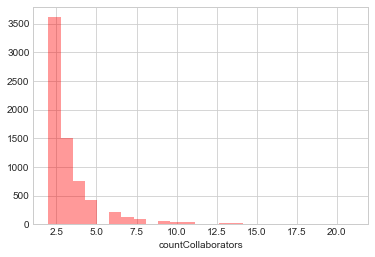

In [52]:
# plot histogram
sns.set_style('whitegrid')
sns.distplot(data_final['countCollaborators'], kde=False,color="red", bins=25) 


[(0, 20)]

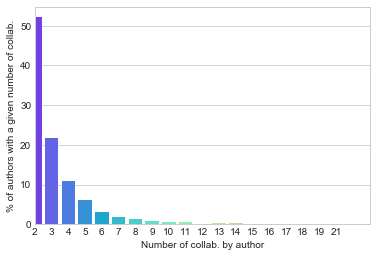

In [53]:
## shows the percentages of authors with given number of publications 
ax = sns.barplot(x= "countCollaborators", y = "countCollaborators", data = data_final, palette='rainbow', 
                 estimator = lambda countCollaborators: len(countCollaborators) / len(data_final) * 100)
ax.set(ylabel="% of authors with a given number of collab.")
ax.set(xlabel="Number of collab. by author")
ax.set(xlim=(0, 20))

In [ ]:
# split the data set into mentor-mentee based on the number of collaborators a person has

mentors = data_final[data_final['countCollaborators'] > 4]['authorId'].unique()
mentees = data_final[data_final['countCollaborators'] <= 4]['authorId'].unique()

In [ ]:
len(mentors)

In [ ]:
len(mentees)

In [ ]:
data_final.head(30)

In [ ]:
# put the data in the following form
# |userId | movieId | rating |

from tqdm import tqdm_notebook as tqdm

tqdm.monitor_interval = 0

df = pd.DataFrame(columns=['userId', 'movieId', 'rating'])

for idx, row in tqdm(data_final.iterrows()):
    if row['authorId'] in mentees:
        for x in row['link_weight_v2']:
            key = x
            rating = row['link_weight_v2'][key] / row['countCollaborators'] #alternative: normalize by row['countPublications']
            if key in mentors:
                df = df.append({'userId': row['authorId'], 'movieId': key, 'rating': rating}, ignore_index=True)
        
    

In [ ]:
df.shape

In [ ]:
# put the data in the following form
# | moveId | title | 

# how many unique authors do we have?
df_movies = pd.merge(df, xml_in_sample, left_on=['movieId'], right_on=['authorId'],  how='left')[['movieId', 'authorName']]
df_movies.drop_duplicates(subset=None, keep='first', inplace=True)

In [ ]:
# save the file to the output
df_movies.to_csv('/Users/aj186039/projects/PMI_UseCase/git_data/pmi2week/UseCase2/Transforming/movies.csv', sep=',', encoding='utf-8', header=True)

In [ ]:
# save the file to the output
df.to_csv('/Users/aj186039/projects/PMI_UseCase/git_data/pmi2week/UseCase2/Transforming/ratings.csv', sep=',', encoding='utf-8', header=True)

In [ ]:
df.head()

In [ ]:
# read the file to test
test = pd.read_csv('/Users/aj186039/projects/PMI_UseCase/git_data/pmi2week/UseCase2/Transforming/ratings.csv', sep = ',', 
                   encoding='utf-8', low_memory=False)

In [ ]:
test.shape

# Some profiling

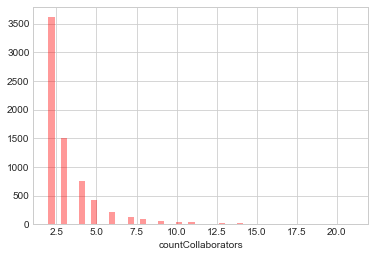

In [54]:
# plot histogram
sns.set_style('whitegrid')
sns.distplot(data_final['countCollaborators'], kde=False,color="red")#, bins=20)


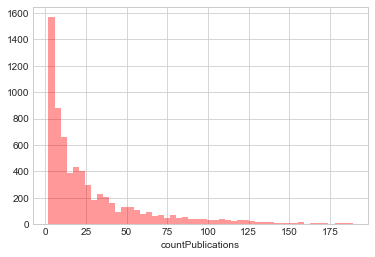

In [55]:
# plot histogram
sns.set_style('whitegrid')
sns.distplot(data_final['countPublications'], kde=False,color="red") # bins=30, 


[(0, 20)]

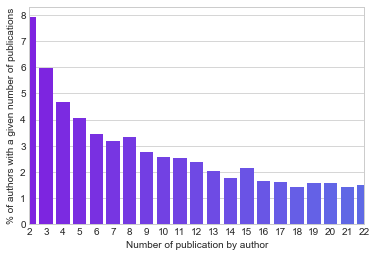

In [56]:
## shows the percentages of authors with given number of publications 
ax = sns.barplot(x= "countPublications", y = "countPublications", data = data_final, palette='rainbow', 
                 estimator = lambda countPublications: len(countPublications) / len(data_final) * 100)
ax.set(ylabel="% of authors with a given number of publications")
ax.set(xlabel="Number of publication by author")
ax.set(xlim=(0, 20))

In [57]:
# in fact this is the same as looking at the group by on count_publications columns and count authors
count_authors_with_given_numer_publications = data_final.groupby('countPublications', as_index=False)['authorId'].count()
count_authors_with_given_numer_publications.columns = ['number_publications', 'how_many_authors_with_given_publications']
count_authors_with_given_numer_publications.head(20)

,number_publications,how_many_authors_with_given_publications
0,2,548
1,3,413
2,4,324
3,5,282
4,6,238
5,7,220
6,8,231
7,9,192
8,10,179
9,11,175


In [58]:
data_final.head()

,authorId,authorName,publicationTitles,authorCollaboratorIds,authorCollaborators,countPublications,publicationKeys,publicationDates,link_weight,link_weight_v2,countCollaborators,duration_career,time_since_last_publication
2,1000016,Dong Seung Kwon,(Optimum rate allocation for two-class service...,"(1223323, 587234, 1149921, 1081044)","(Hee Goo Han, Young Seog Song, Myeongcheol Shi...",35,"(journals/tcom/KimKK03, journals/tce/KwonLP04,...","(2017-05-28 00:00:00, 2017-05-28 00:00:00, 201...","{'Hee Goo Han': 1, 'Young Seog Song': 1, 'Myeo...","{'1223323': 1, '587234': 1, '1149921': 1, '108...",4,4992 days,273
21,1000492,Bei Wu,(New interval availability indexes for Markov ...,"(273223, 1002465)","(Bifan Wei, Yong-fui Zhang)",10,"(journals/ress/CuiCW17, conf/whiceb/YangWW16, ...","(2017-11-02 00:00:00, 2016-11-09 00:00:00, 201...","{'Bifan Wei': 1, 'Yong-fui Zhang': 1}","{'273223': 1, '1002465': 1}",2,483 days,8
36,1000869,Britta Weber,(Omnidirectional displacements for deformable ...,"(288844, 1140229)","(Stefan Zachow, Marcel Oberlnullnder)",7,"(journals/mia/KainmuellerLHWHZ13, journals/ijc...","(2017-06-06 00:00:00, 2012-03-05 00:00:00, 201...","{'Stefan Zachow': 1, 'Marcel Oberlnullnder': 1}","{'288844': 1, '1140229': 1}",2,2021 days,180
53,1001196,Benjamin Blau,"(Business Models in the Service World., A mult...","(849101, 1724344, 397804)","(Sebastian Speiser, Matthias Armbruster, Anca ...",32,"(journals/itpro/WeinhardtABS09, journals/ecra/...","(2017-05-27 00:00:00, 2017-05-28 00:00:00, 201...","{'Sebastian Speiser': 2, 'Matthias Armbruster'...","{'849101': 2, '1724344': 2, '397804': 1}",3,3393 days,291
105,1002125,Giancarlo Bongiovanni,(Time Slot Assignment in SS/TDMA Systems with ...,"(1933841, 1808430, 47340)","(Alan A. Bertossi, Giorgio Gambosi, Paolo Penna)",30,"(journals/tcom/BertossiBB87, journals/tcom/Bon...","(2017-05-28 00:00:00, 2017-05-28 00:00:00, 201...","{'Alan A. Bertossi': 1, 'Giorgio Gambosi': 1, ...","{'1933841': 3, '1808430': 1, '47340': 1}",3,5634 days,281


In [59]:
# calculate the proportion of author above a given number (of publication)
# borrowed from Baptiste and adapted to work on dataframe instead on dict.

def get_author_with_more_than(data, max_): 
    more_than = [row[2] for row in data.itertuples() if row[6] > max_]
    print("Authors with more than {0}: {1} ({2}%)".format(max_, len(more_than), round(len(more_than)/len(data)*100,4)))

get_author_with_more_than(data_final, 1010)
get_author_with_more_than(data_final, 500) 
get_author_with_more_than(data_final, 300)
get_author_with_more_than(data_final, 200)
get_author_with_more_than(data_final, 190)
get_author_with_more_than(data_final, 50)
get_author_with_more_than(data_final, 10)
get_author_with_more_than(data_final, 5)

Authors with more than 1010: 0 (0.0%)
Authors with more than 500: 0 (0.0%)
Authors with more than 300: 0 (0.0%)
Authors with more than 200: 0 (0.0%)
Authors with more than 190: 0 (0.0%)
Authors with more than 50: 1298 (18.7437%)
Authors with more than 10: 4298 (62.065%)
Authors with more than 5: 5358 (77.3718%)


In [ ]:
data_final.head()